In [1]:
import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold

from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [28]:
ads = pd.read_csv('amazon_ten_topic_data.csv'.csv', names=['ad'])
ads.dropna(inplace=True)
ads.describe()

,ad
count,10000
unique,9934
top,USB Printer with 3 Year Printer Warranty
freq,6


In [33]:
blanks = []  # start with an empty list

for i,ad in ads.itertuples():  # iterate over the DataFrame
    if type(ad)==str:            # avoid NaN values
        if ad.isspace():         # test 'review' for whitespace
            blanks.append(i)     # add matching index numbers to the list
        
print(len(blanks), 'blanks: ', blanks)

0 blanks:  []


In [29]:
ads_unique = pd.DataFrame(ads['ad'].unique(), columns = ['ad'])
ads_unique.describe()

,ad
count,10000
unique,9934
top,USB Printer with 3 Year Printer Warranty
freq,6


### Removing punctuation

In [4]:
def punct(text):
    """Function for removing punctuation. 
    This function replaces the punctuation with no space, which in effect deletes the punctuation marks.
    Return: text stripped of punctuation marks"""
    import string
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

In [5]:
ads_unique['ad'] = ads_unique['ad'].apply(punct)
ads_unique.head()

,ad
0,JR2 Shining Double Row Crystal Metal License P...
1,UpgradedBOYISEN Trailer Hitch Pin Lock 12 and ...
2,SUMEX 5070138b Hubcap
3,Rugged Ridge 1520116 125 Wheel Spacer for 2007...
4,Bondhus 33034 Set of 8 Star Thandles Graduated...


### Removing stopwords

In [6]:
# extracting the stopwords from the nltk library
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [7]:
print('Number of stopwords: ', len(sw))

Number of stopwords:  179


In [8]:
def stopwords(text):
    """Function for removing stopwords."""
    # removing the stop words amd lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the lst of words with space separator
    return " ".join(text)

In [9]:
ads_unique['ad'] = ads_unique['ad'].apply(stopwords)
ads_unique.head()

,ad
0,jr2 shining double row crystal metal license p...
1,upgradedboyisen trailer hitch pin lock 12 58 r...
2,sumex 5070138b hubcap
3,rugged ridge 1520116 125 wheel spacer 20072017...
4,bondhus 33034 set 8 star thandles graduated le...


### Top words before stemming

In [10]:
# count vetorizing object
count_vectorizer = CountVectorizer()

# fitting CV
count_vectorizer.fit(ads_unique['ad'])

# collecting the vocabulary items used in vectorizer
dictionary = count_vectorizer.vocabulary_.items()

In [11]:
# Storing vocab and counts in a pandas DF
vocab = []
count = []

# iterating through each vocab and count append the value to designated list
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
    
# storing the count in pandas DF with vocab as index
vocab_bef_stem = pd.Series(count, index = vocab)

# sorting the DF
vocab_bef_stem = vocab_bef_stem.sort_values(ascending=False)

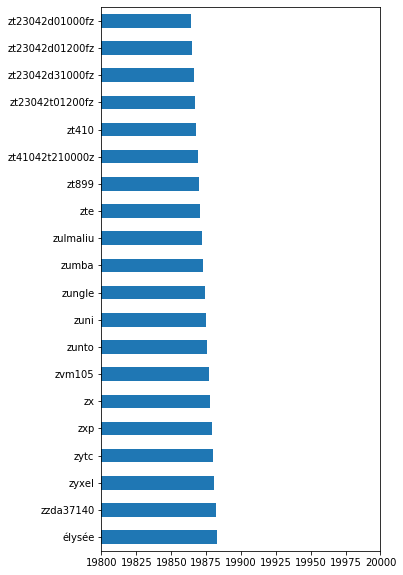

In [12]:
top_vocab = vocab_bef_stem.head(20)
top_vocab.plot(kind = 'barh', figsize=(5, 10), xlim=(19800, 20000))

### Stemming

In [13]:
stemmer = SnowballStemmer('english')

def stemming(text):
    """Function with stems each word in the given text. Stemming operation bundles together words of same root.
    E.g. 'response' and 'respond' bundles up into common 'respon'
    """
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [14]:
ads_unique['ad'] = ads_unique['ad'].apply(stemming)
ads_unique.head()

,ad
0,jr2 shine doubl row crystal metal licens plate...
1,upgradedboyisen trailer hitch pin lock 12 58 r...
2,sumex 5070138b hubcap
3,rug ridg 1520116 125 wheel spacer 20072017 toy...
4,bondhus 33034 set 8 star thandl graduat length...


### Top words after stemming

In [15]:
# Collecting vocabulary count
tfid_vect = TfidfVectorizer('english')

tfid_vect.fit(ads_unique['ad'])
# colelcting the vocabulary items used in the vectorizer
              
dictionary = tfid_vect.vocabulary_.items()
dictionary

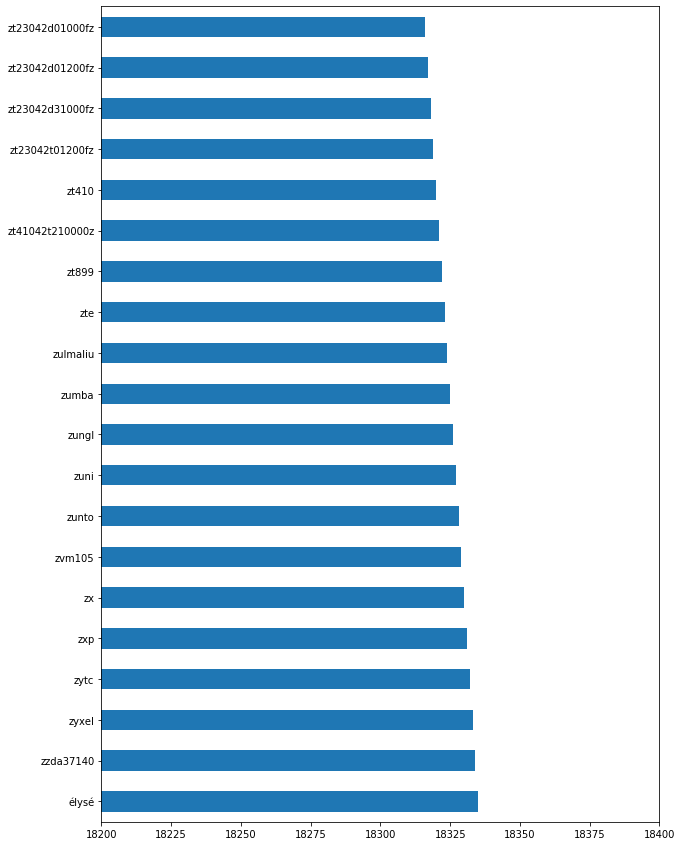

In [16]:
# Storing vocab and counts in a pandas DF
vocab = []
count = []

# iterating through each vocab and count append the value to designated list
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
    
# storing the count in pandas DF with vocab as index
vocab_after_stem = pd.Series(count, index = vocab)

# sorting the DF
vocab_after_stem = vocab_after_stem.sort_values(ascending=False)

top_vocab = vocab_after_stem.head(20)
top_vocab.plot(kind = 'barh', figsize=(10, 15), xlim=(18200, 18400))

### Length of each ad

In [17]:
def length(text):
    """Function that returns the length of a text"""
    return len(text)

In [18]:
ads_unique['len'] = ads_unique['ad'].apply(length)
ads_unique.head()

,ad,len
0,jr2 shine doubl row crystal metal licens plate...,71
1,upgradedboyisen trailer hitch pin lock 12 58 r...,102
2,sumex 5070138b hubcap,21
3,rug ridg 1520116 125 wheel spacer 20072017 toy...,66
4,bondhus 33034 set 8 star thandl graduat length...,57


 ### TF-IDF

In [19]:
tfidf = tfid_vect.transform(ads_unique['ad'])

array = tfidf.todense()

In [20]:
# storing tf-idf array in the pandas DF
df = pd.DataFrame(array)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,18326,18327,18328,18329,18330,18331,18332,18333,18334,18335
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Training Model

In [21]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,18326,18327,18328,18329,18330,18331,18332,18333,18334,18335
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=3, min_samples=4).fit(df)

In [23]:
clustering.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [24]:
clustering

DBSCAN(algorithm='auto', eps=3, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=4, n_jobs=None, p=None)

In [25]:
n_clusters_ = len(set(clustering.labels_)) - (1 if -1 in clustering.labels_ else 0)
n_noise_ = list(clustering.labels_).count(-1)

In [26]:
n_clusters_

1

In [27]:
from sklearn import metrics
metrics.silhouette_score(df, clustering.labels_)

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)